In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import imageio.v2 as imageio
# from skimage.measure import compare_psnr

In [2]:
import math
def performzeropadding(image): 
 org_h,org_w,channel=np.array(image.shape)   
 org_h = np.int32(org_h)
 org_w = np.int32(org_w)
 

 nbh = math.ceil(org_h/8)            #number of block must be divisible by 8
 nbh = np.int32(nbh)

 nbw = math.ceil(org_w/8)
 nbw = np.int32(nbw)

 H =  8 * nbh
 W =  8 * nbw
    
 paddedimage = np.zeros((H,W,3), 'uint8')
 paddedimage[0:org_h,0:org_w] = image[0:org_h,0:org_w]
 return(paddedimage)
 

In [3]:
def extractwatermark1(watermarkedimage, originalimage, X_watermark, Y_watermark):       
 
 finalwatermark = np.zeros((X_watermark,Y_watermark,3), 'uint')  
 
 r1_dct=cv2.dct(watermarkedimage[:,:,0])
 g1_dct=cv2.dct(watermarkedimage[:,:,1])
 b1_dct=cv2.dct(watermarkedimage[:,:,2])

    #dct for original image  
    
 dct_r=cv2.dct(originalimage[:,:,0])
 dct_g=cv2.dct(originalimage[:,:,1])
 dct_b=cv2.dct(originalimage[:,:,2])

 x=X_watermark;
 y=Y_watermark;
 
 a= (r1_dct[1:x+1,1:y+1] - dct_r[1:x+1,1:y+1] * alpha)  / (1-alpha) 
 b= (g1_dct[1:x+1,1:y+1] - dct_g[1:x+1,1:y+1] * alpha)  / (1-alpha)
 c= (b1_dct[1:x+1,1:y+1] - dct_b[1:x+1,1:y+1] * alpha)  / (1-alpha)
#  a= ((r1_dct[1:x+1,1:y+1] - dct_r[1:x+1,1:y+1]) * alpha)  / (1-alpha) 
#  b= ((g1_dct[1:x+1,1:y+1] - dct_g[1:x+1,1:y+1])* alpha)  / (1-alpha)
#  c= ((b1_dct[1:x+1,1:y+1] - dct_b[1:x+1,1:y+1]) * alpha)  / (1-alpha)
  
 finalwatermark[:,:,0]=cv2.idct(a)*255
 finalwatermark[:,:,1]=cv2.idct(b)*255
 finalwatermark[:,:,2]=cv2.idct(c)*255

#  print(type(finalwatermark))
#  print(finalwatermark.dtype)

 normalizedfinalimage=np.clip(finalwatermark,0,1)
#  print(type(normalizedfinalimage))
#  print(normalizedfinalimage.dtype)
 
 return (finalwatermark,normalizedfinalimage)

In [4]:
alpha=0.99

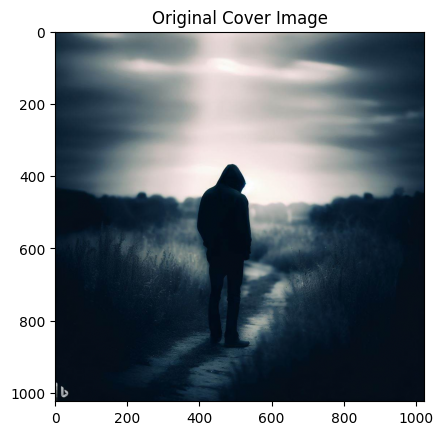

         Cover Image Size= (1024, 1024, 3)


In [5]:
#step-1: Read CoverImage

fn2 = 'C:/Users/dines/Desktop/project okay/test_files/boy.jpg'
coverimage = performzeropadding( imageio.imread(fn2)) #read image in RGB
cover_int=coverimage
coverimage=coverimage/255;
plt.imshow(coverimage)
# plt.axis('off')
plt.title("Original Cover Image")
plt.show()
print("         Cover Image Size=",coverimage.shape)





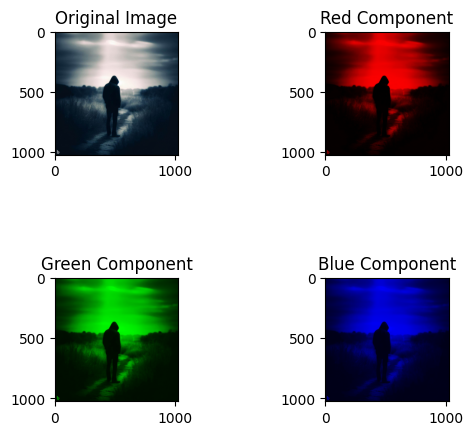

In [6]:
#step-2: Extract Red, Green and Blue Component from cover image

red_cover = coverimage.copy()
# set green and blue channels to 0
red_cover[:, :, 1] = 0
red_cover[:, :, 2] = 0

green_cover = coverimage.copy()
# set red and blue channels to 0
green_cover[:, :, 0] = 0
green_cover[:, :, 2] = 0

blue_cover = coverimage.copy()
# set green and red channels to 0
blue_cover[:, :, 0] = 0
blue_cover[:, :, 1] = 0


#Displaying each components of Cover Image
plt.subplot(2,2,1)
plt.imshow(coverimage)
plt.title("Original Image")


plt.subplot(2,2,2)
plt.imshow(red_cover)
plt.title("Red Component")


plt.subplot(2,2,3)
plt.imshow(green_cover)
plt.title("Green Component")

plt.subplot(2,2,4)
plt.imshow(blue_cover)
plt.title("Blue Component")


plt.subplots_adjust(hspace = 1)
plt.show()


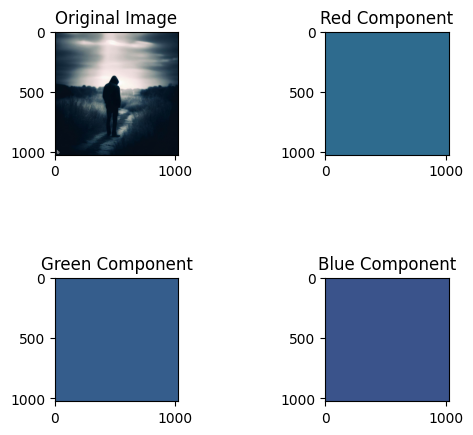

In [7]:
#Step-3, Getting DCT for each RGB components

dct_r_org= cv2.dct(coverimage[:,:,0])
dct_g_org= cv2.dct(coverimage[:,:,1])
dct_b_org= cv2.dct(coverimage[:,:,2])


plt.subplot(2,2,1)
plt.imshow(coverimage)
plt.title("Original Image")


plt.subplot(2,2,2)
plt.imshow(dct_r_org)
plt.title("Red Component")


plt.subplot(2,2,3)
plt.imshow(dct_g_org)
plt.title("Green Component")

plt.subplot(2,2,4)
plt.imshow(dct_b_org)
plt.title("Blue Component")


plt.subplots_adjust(hspace = 1)
plt.show()

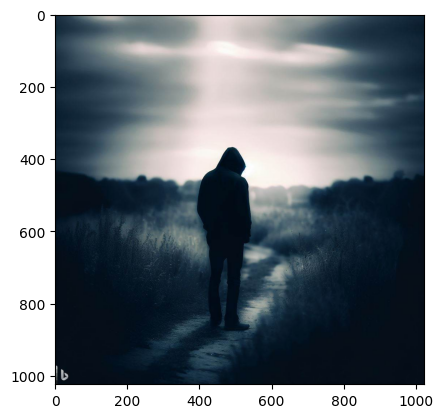

In [8]:
#checking to see if original figure can be reconstructed using IDCT or not

DCT_RGB_org = np.zeros((coverimage.shape[0],coverimage.shape[1],3), 'float64')
DCT_RGB_org[:,:,0] = cv2.idct(dct_r_org)
DCT_RGB_org[:,:,1] = cv2.idct(dct_g_org)
DCT_RGB_org[:,:,2] = cv2.idct(dct_b_org)

normalizedDCT_RGB_org=np.clip(DCT_RGB_org,0,1)
plt.imshow(normalizedDCT_RGB_org)
plt.show()




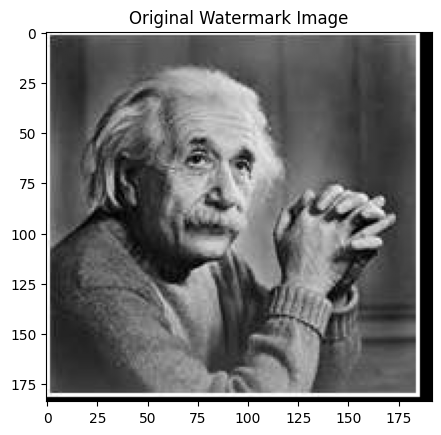

         Watermark Image Size= (184, 192, 3)
<class 'numpy.ndarray'>
uint8


In [9]:
#Step-4, Read Watermark Image

fn3= "C:/Users/dines/Desktop/project okay/test_files/albert.jpg"
watermarkimage = performzeropadding( imageio.imread(fn3)) #read image in RGB
watermarkimage_int=watermarkimage
watermarkimage=watermarkimage/255;


plt.imshow(watermarkimage)
plt.title("Original Watermark Image")
plt.show()
print("         Watermark Image Size=",watermarkimage.shape)


print(type(watermarkimage_int))
print(watermarkimage_int.dtype)







In [10]:
#Step-5, Getting DCT for each RGB components for watermark image
dct_r_w= cv2.dct(watermarkimage[:,:,0])
dct_g_w= cv2.dct(watermarkimage[:,:,1])
dct_b_w= cv2.dct(watermarkimage[:,:,2])

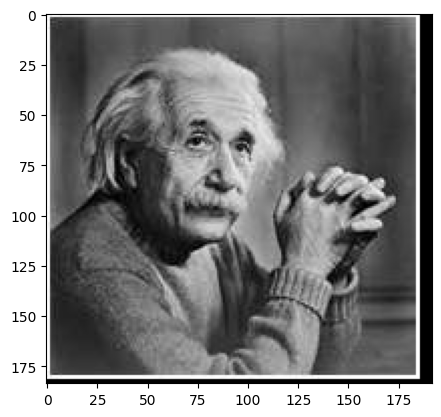

In [11]:
#checking to see if original watermark figure can be reconstructed using IDCT or not

DCT_RGB_wat = np.zeros((watermarkimage.shape[0],watermarkimage.shape[1],3), 'float64')
DCT_RGB_wat[:,:,0] = cv2.idct(dct_r_w)
DCT_RGB_wat[:,:,1] = cv2.idct(dct_g_w)
DCT_RGB_wat[:,:,2] = cv2.idct(dct_b_w)
normalizedDCT_RGB_wat = np.clip(DCT_RGB_wat,0,1)   # making in range 0 to 1
plt.imshow(normalizedDCT_RGB_wat)
plt.show()


In [12]:
#step-6, Store the Watermark image into the Cover image  using alpha blending function. alpha=0.99 used here



dct_r_org[1:watermarkimage.shape[0]+1, 1:watermarkimage.shape[1]+1]= alpha * dct_r_org[1:watermarkimage.shape[0]+1, 1:watermarkimage.shape[1]+1] + (1-alpha) * dct_r_w
dct_g_org[1:watermarkimage.shape[0]+1, 1:watermarkimage.shape[1]+1]= alpha * dct_g_org[1:watermarkimage.shape[0]+1, 1:watermarkimage.shape[1]+1] + (1-alpha) * dct_g_w
dct_b_org[1:watermarkimage.shape[0]+1, 1:watermarkimage.shape[1]+1]= alpha * dct_b_org[1:watermarkimage.shape[0]+1, 1:watermarkimage.shape[1]+1] + (1-alpha) * dct_b_w








<class 'numpy.ndarray'>
float64


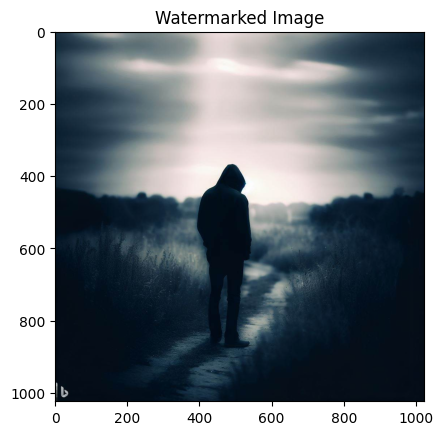

Lossy conversion from float64 to uint8. Range [-0.0077807463054370835, 1.0015977410676382]. Convert image to uint8 prior to saving to suppress this warning.


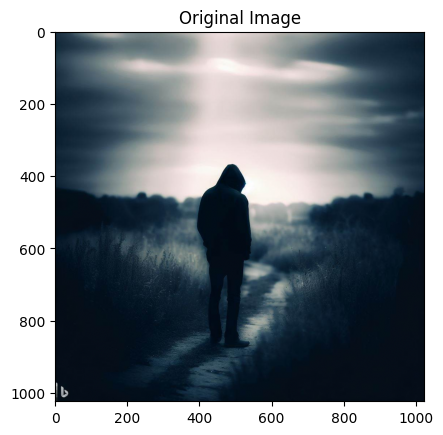

<class 'numpy.ndarray'>
float64
<class 'numpy.ndarray'>
float64
PSNR= 103.87744823598838
MSE= 2.6627815385830377e-06


In [13]:
#Displaying the watermarked image

idct_r=cv2.idct(dct_r_org)
idct_g=cv2.idct(dct_g_org)
idct_b=cv2.idct(dct_b_org)

# imageio.imwrite('15_stagimage.jpg',stagimage)

stagimage = np.zeros((coverimage.shape[0],coverimage.shape[1],3), 'float64')
stagimage[:,:,0]=idct_r;
stagimage[:,:,1]=idct_g;
stagimage[:,:,2]=idct_b;

print(type(stagimage))
print(stagimage.dtype)
normalizedstagimage=np.clip(stagimage,0,1)

plt.imshow(normalizedstagimage)
plt.title("Watermarked Image")
plt.show()

plt.imshow(coverimage)

plt.title("Original Image")
imageio.imwrite('watermark111.jpg',stagimage)
# cv2.imwrite('15_stagimage.png',stagimage)
plt.show()

print(type(coverimage))
print(coverimage.dtype)

print(type(normalizedstagimage))
print(normalizedstagimage.dtype)


psnr = cv2.PSNR(coverimage, normalizedstagimage)
mse = ((coverimage - normalizedstagimage) ** 2).mean()
print('PSNR=', psnr)
print('MSE=', mse)

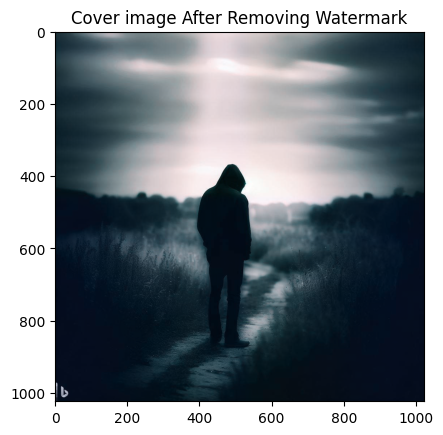

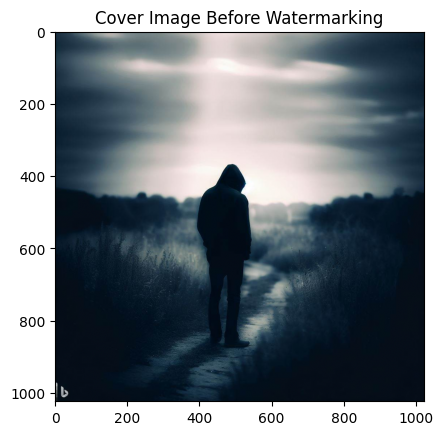

In [14]:
#Displaying coverimage without watermark

watermarkedimage=stagimage;
# watermarkedimage=normalizedstagimage;

# # Load watermarked image as NumPy array
# watermarkedimage = imageio.imread('15_stagimage.jpg')
# # watermarkedimage.save('hwloooo.jpg')
# imageio.imwrite('16_stagimage.jpg',watermarkedimage)

# # Convert image to grayscale
# watermarkedimage = cv2.cvtColor(watermarkedimage, cv2.COLOR_RGB2GRAY)

# # Convert image to float64
# watermarkedimage = np.float64(watermarkedimage)
# print(type(img_float64))
# print(img_float64.dtype)
# imageio.imwrite('feriiiiiii.jpg',watermarkedimage)
# watermarkedimage = np.zeros((watermarkedimage.shape[0],watermarkedimage.shape[1],3), 'float64')
# watermarkedimage = np.zeros((watermarkedimage.shape[0],watermarkedimage.shape[1],3), 'float64')


# watermarkedimage = performzeropadding(watermarkedimage) #read image in RGB

# watermarkedimage=watermarkedimage/255



DCT_RGB_waterunmarked = np.zeros((coverimage.shape[0],coverimage.shape[1],3), 'float64')

r1_dct=cv2.dct(watermarkedimage[:,:,0])
g1_dct=cv2.dct(watermarkedimage[:,:,1])
b1_dct=cv2.dct(watermarkedimage[:,:,2])


#remove watermark info using inverse alpha blending function
r1_dct[1:watermarkimage.shape[0]+1,1:watermarkimage.shape[1]+1] = dct_r_w + r1_dct[1:watermarkimage.shape[0]+1,1:watermarkimage.shape[1]+1] - dct_r_w/alpha
g1_dct[1:watermarkimage.shape[0]+1,1:watermarkimage.shape[1]+1] = dct_g_w + g1_dct[1:watermarkimage.shape[0]+1,1:watermarkimage.shape[1]+1] - dct_g_w/alpha
b1_dct[1:watermarkimage.shape[0]+1,1:watermarkimage.shape[1]+1] = dct_b_w + g1_dct[1:watermarkimage.shape[0]+1,1:watermarkimage.shape[1]+1] - dct_b_w/alpha

DCT_RGB_waterunmarked[:,:,0]=cv2.idct(r1_dct);
DCT_RGB_waterunmarked[:,:,1]=cv2.idct(g1_dct);
DCT_RGB_waterunmarked[:,:,2]=cv2.idct(b1_dct);

normalizedDCT_RGB_waterunmarked=np.clip(DCT_RGB_waterunmarked,0,1)
plt.imshow(normalizedDCT_RGB_waterunmarked)
plt.title("Cover image After Removing Watermark")
plt.show()

plt.imshow(coverimage)

plt.title("Cover Image Before Watermarking")


plt.show()







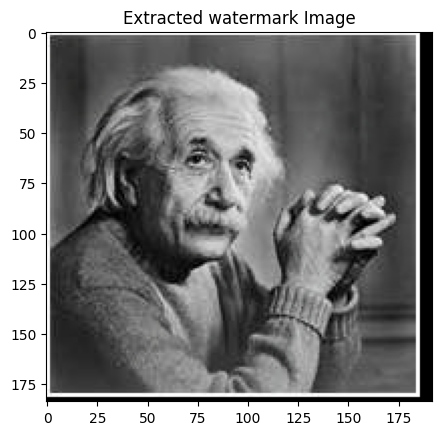

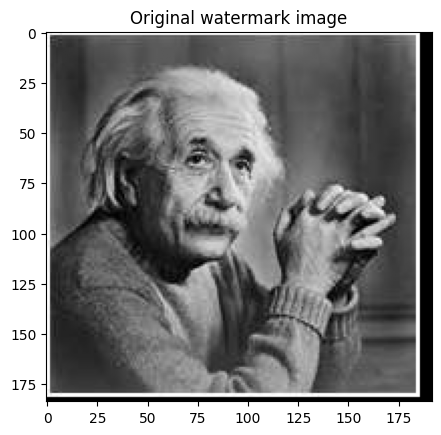

Lossy conversion from uint32 to uint8. Losing 24 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


<class 'numpy.ndarray'>
float64
<class 'numpy.ndarray'>
uint32
<class 'numpy.ndarray'>
uint32
<class 'numpy.ndarray'>
float64
PSNR= 52.35704355077286
MSE= 0.3778992289406527


In [15]:
#Extractin secretimage i.e. watrmark image

waterMarkImgExtracted, extractedWatermark = extractwatermark1(watermarkedimage, coverimage, watermarkimage.shape[0], watermarkimage.shape[1])
plt.imshow(waterMarkImgExtracted)
plt.title('Extracted watermark Image')
plt.show()

plt.imshow(watermarkimage)
plt.title("Original watermark image")
plt.show()

imageio.imwrite('waterMarkImgExtracted111.jpg',extractedWatermark)

print(type(watermarkimage))
print(watermarkimage.dtype)

print(type(waterMarkImgExtracted))
print(waterMarkImgExtracted.dtype)


print(type(extractedWatermark))
print(extractedWatermark.dtype)


# watermarkimage = watermarkimage.astype(np.float64)
extractedWatermark = extractedWatermark.astype(np.float64)

print(type(extractedWatermark))
print(extractedWatermark.dtype)


psnr = cv2.PSNR(watermarkimage, extractedWatermark)
# psnr = compare_psnr(watermarkimage, waterMarkImgExtracted)
mse = ((watermarkimage - extractedWatermark) ** 2).mean()
print('PSNR=', psnr)
print('MSE=', mse)